# Introduction to Decision Trees
----

Before we build our first tree, it is worth learning a bit about _how_ they work. Below is a diagram showing the conceptual structure of a decision tree.

<img src='https://github.com/James-Leslie/Jupyter-Notebooks/blob/master/3_Tree-Based_Regression/tree_1.png?raw=TRUE' width=900/>

Decision trees consist of:
 * Root node
 * Decision nodes
 * Terminal nodes
 
The tree above is used to partition data which consists of two variables, X and Y.    
We will refer to X as the independent variable which is being used to predict Y.   

All data points are passed from the root node, through the decision nodes until they find their matching terminal node.   

## Decision process
Consider the example of a new datapoint with an X value of 4.5. Suppose we wanted to predict the Y value for this new datapoint - the path that the new point would follow along the decision tree is shown below:       

<img src='https://github.com/James-Leslie/Jupyter-Notebooks/blob/master/3_Tree-Based_Regression/tree_3.png?raw=TRUE' width=900/>

The new datapoint would follow the green path shown above and would eventually be assigned a Y value of 2.   

Okay great, so we know how to _use_ a decision tree. But where did the values of the split points come from, and how do we know how many 'branches' the tree should have? 

## Training a decision tree
In the decision process, datapoints start at the root node and end at a terminal node. The training process follows the same pattern.   

In training a decision tree, we begin with all of our training data at the root node and then partition the data into smaller subsets which form the 'branches' of the tree.   

When partitioning the data, two questions need to be answered:
 1. which predictor variable should be used as the split criterion?
 2. what value of the predictor variable should be used as the splitting point?

Partitioning happens at each node in the tree using an algorithm known as **recursive binary splitting** which uses the following logic:
 1. Consider all possible predictor variables
  * Consider all possible splits for each variable
 2. Select predictor and split based on best separation of data
 3. Divide data into 2 subsets based on the selected split
 4. Repeat steps 1-3 for all subsets until some desired ending criteria has been reached
   
<img src='https://github.com/James-Leslie/Jupyter-Notebooks/blob/master/3_Tree-Based_Regression/splitting_1.png?raw=TRUE' width=900/>

The best split point is chosen on its ability to separate the data. On either side of the split point, all datapoints' y values are compared to the mean y value of that subset and this is used to calculate the **mean squared error** (MSE). The best split point is the one which minimises the MSE on both sides.   

After a number of splits, the final partitions might look something like the diagram below:

<img src='https://github.com/James-Leslie/Jupyter-Notebooks/blob/master/3_Tree-Based_Regression/splitting_2.png?raw=TRUE' width=900/>

## Build a Decision Tree using scikit-learn
---
So now that we have an understanding of how decision trees work, let's implement one using scikit-learn.   

We'll start by importing some commonly used Python libraries and loading our data:

In [22]:
import numpy as np  # used for mathematical operations
import pandas as pd  # for loading CSV data
import matplotlib.pyplot as plt  # for plotting data
import seaborn as sns  # to make plots look nicer

In [13]:
df = pd.read_csv('data_1.csv', index_col=0)
df.head()

,ZAR/USD,Value of Exports (ZAR)
2008M01,7.01,39356.82
2008M02,7.66,46946.33
2008M03,7.97,51150.89
2008M04,7.79,56174.34
2008M05,7.62,56240.45


The data we will be working with here consists of two variables:
 * Rand/Dollar exchange rate
 * Value of South Africa exports
 
We will be using the value of exports (independent variable) to try and predict the exchange rate (dependent variable).   

Let's take a look at the data using matplotlib:

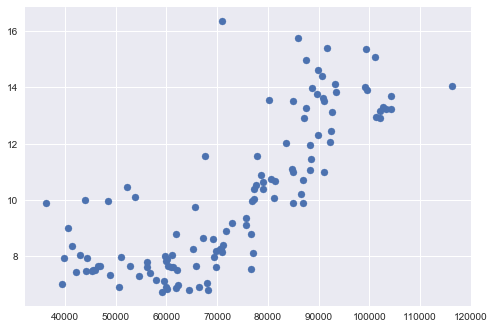

In [14]:
y = df['ZAR/USD'].values  # dependent variable
X = df.drop('ZAR/USD', axis=1).values  # independent variable

plt.scatter(X, y)  # create scatter plot
plt.show()  # display the plot

In [15]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

In [16]:
# fit regression trees
regr_tree = DecisionTreeRegressor(max_depth=2)
regr_tree.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [17]:
X_test = np.arange(min(X), max(X), 100)[:, np.newaxis]

In [18]:
len(X_test)

800

In [19]:
# predict
gen_y = regr_tree.predict(X_test)

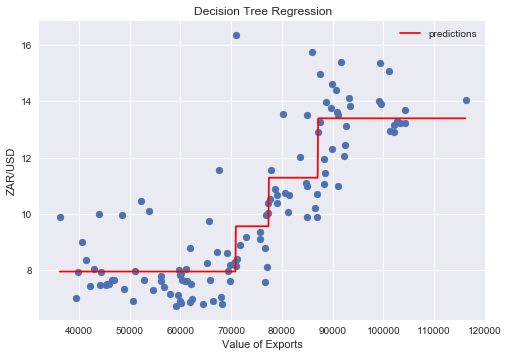

In [21]:
# plot the results
plt.figure()
plt.scatter(X, y)
plt.plot(X_test, gen_y, color="red", label='predictions')
plt.xlabel("Value of Exports")
plt.ylabel("ZAR/USD")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()